#### Python для анализа данных


In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [2]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов

Для тех переменных, в которых есть пропуске, выведите количество пропущенных значений в следующем формате:

"В переменной {название переменной} {количество} пропущенных значений"

In [3]:
## NaN is 0?
## Но если ноль в Pregnancies это же не факт что это NaN
data_without_class = data.loc[:, (data.columns != 'Class') & (data.columns != 'Pregnancies')]
null_table = data_without_class.mask(data_without_class == 0).isnull()

for column in data_without_class.columns:
    print(f"В переменной {column} {null_table[column].sum()} пропущенных значений")

В переменной Glucose 5 пропущенных значений
В переменной BloodPressure 35 пропущенных значений
В переменной SkinThickness 227 пропущенных значений
В переменной Insulin 374 пропущенных значений
В переменной BMI 11 пропущенных значений
В переменной DiabetesPedigreeFunction 0 пропущенных значений
В переменной Age 0 пропущенных значений


__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [4]:
discrete_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']
continuous_features = ['BMI', 'DiabetesPedigreeFunction']

data[discrete_features] = data[discrete_features].mask(data_without_class == 0).fillna(data[discrete_features].median())
data[continuous_features] = data[continuous_features].mask(data_without_class == 0).fillna(data[continuous_features].mean())

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,30.5,33.600000,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.600000,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.300000,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.100000,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.100000,2.288,33,1
5,5,116.0,74.0,23.0,30.5,25.600000,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.000000,0.248,26,1
7,10,115.0,72.0,23.0,30.5,35.300000,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1
9,8,125.0,96.0,23.0,30.5,31.992578,0.232,54,1


__Задание 3.__

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [6]:
data[(data.Age > 50) & (data.Class)].shape[0]

38

__Задание 5.__

Найдите трех женщин с наибольшими числом беременностей.

In [7]:
data.sort_values(by=['Pregnancies'], ascending=False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин успели родить 3 или более детей до 30 лет?

In [8]:
## А как мы по этим данным можем понять что женщина родила именно до 30ти?
data[(data.Pregnancies >= 3) & (data.Age < 30)].shape[0]

117

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [9]:
print(f"{data[(data.BloodPressure >= 80) & (data.BloodPressure <= 89)].shape[0] / data.shape[0] * 100} %")

18.880208333333336 %


__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [10]:
data[(data.BMI >= 30) & (data.BloodPressure > data.BloodPressure.mean())].shape[0]

251

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

__Задание 10.__

Постройте круговую диаграмму для признака __Class__.

<AxesSubplot:xlabel='None,Class'>

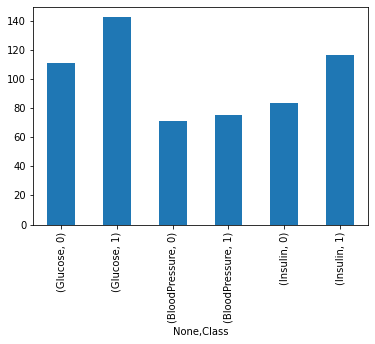

In [11]:
data.groupby(['Class'])[['Glucose', 'BloodPressure', 'Insulin']].mean().unstack().plot(kind='bar', stacked = True)

<AxesSubplot:title={'center':'Class'}, ylabel='None'>

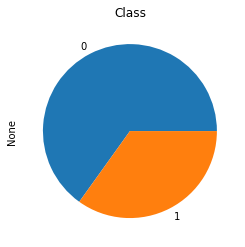

In [12]:
data.groupby('Class').size().plot(kind = 'pie', title = 'Class')

__Задание 11.__

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

*Доп. баллы*
Постройте нормальное распределение поверх графика.

/home/yuliya/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

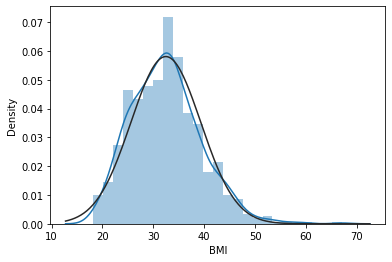

In [13]:
from scipy.stats import norm

sns.distplot(data.BMI, fit=norm)

Как мы можем наблюдать, распределение BMI близко к нормальному.
Из этого можно сделать вывод, что наши данные более менее достоверные, и заменять пропущенные значения на среднее значение было правильным решением.

__Задание 12.__

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

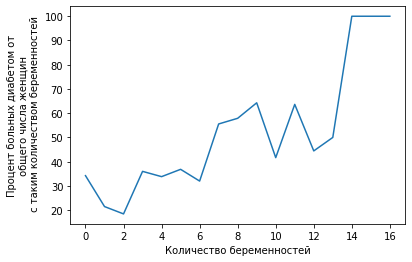

In [14]:
g = data.groupby(['Class'])['Pregnancies'].value_counts().unstack()

sums = g.sum()

percents = []

for i in g:
    percents.append(g[i][1] / sums[i] * 100)

plt.xlabel('Количество беременностей')
plt.ylabel('Процент больных диабетом от\n общего числа женщин \n с таким количеством беременностей')
plt.plot(percents)

__Задание 13.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [15]:
data['wasPregnant'] = (data.Pregnancies > 0).astype(int)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0,1
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


__Задание 14.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [16]:
dont_preg_percent = data[(data.Class == 1) & (data.Pregnancies > 0)].shape[0] / data[data.Pregnancies > 0].shape[0] * 100
preg_percent = data[(data.Class == 1) & (data.Pregnancies == 0)].shape[0]  / data[data.Pregnancies == 0].shape[0] * 100

d = {"Percet of ill": [dont_preg_percent, preg_percent]}
df = pd.DataFrame(data=d)
print(df)

   Percet of ill
0      35.007610
1      34.234234


__Задание 15.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 
    
Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [17]:
def get_bodyType(x):
    if x < 18.5:
        return "Underweight"
    if x >= 18.5 and x < 25:
        return "Normal weight"
    if x >=25 and x < 30:
        return "Overweight"
    else:
        return "Obesity"

data['bodyType'] = [get_bodyType(bmi) for bmi in data.BMI]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0,1,Overweight
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,Obesity


__Задание 16.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [18]:
healthy = data[(data.BMI >= 18.5) & (data.BMI < 25) & (data.BloodPressure >= 80) & (data.BloodPressure <= 89)]
percent = healthy.shape[0]
print(f"{healthy[healthy.Class == 1].shape[0] / percent * 100} %")

10.0 %
